Project (Random Forest Regressor):
- Decision Tree: Increse accuracy from 45% to 50%
- link: 'https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv'


In [11]:
#importing all Librabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [23]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [24]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
df.shape

(301, 9)

In [27]:
print("Fuel_Type",df.Fuel_Type.unique())
print("Seller_Type",df.Seller_Type.unique())
print("Transmission",df.Transmission.unique())
print("Owner Types",df.Owner.unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Types [0 1 3]


In [29]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [32]:
df['No. of year'] = 2025 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [36]:
df.drop(columns=['Year'],inplace=True)

In [ ]:
df.drop(columns=['Car_Name'],inplace=True)

In [38]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [50]:
#USe dummies from pandas it just work like OneHotEncoder
# Step 1: Apply get_dummies (converts categorical strings to 0/1 columns)
df = pd.get_dummies(df)

# Step 2: Make sure all boolean values (True/False) are converted to 0/1
df = df.astype(int)

# Step 3: View the result
df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,No. of year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3,5,27000,0,11,0,0,1,1,0,0,1
1,4,9,43000,0,12,0,1,0,1,0,0,1
2,7,9,6900,0,8,0,0,1,1,0,0,1
3,2,4,5200,0,14,0,0,1,1,0,0,1
4,4,6,42450,0,11,0,1,0,1,0,0,1


In [52]:
df.shape

(301, 12)

In [53]:
df.drop(columns=['Fuel_Type_CNG','Seller_Type_Dealer','Transmission_Automatic'],inplace=True)

In [54]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,11,0,1,0,1
1,4,9,43000,0,12,1,0,0,1
2,7,9,6900,0,8,0,1,0,1
3,2,4,5200,0,14,0,1,0,1
4,4,6,42450,0,11,1,0,0,1


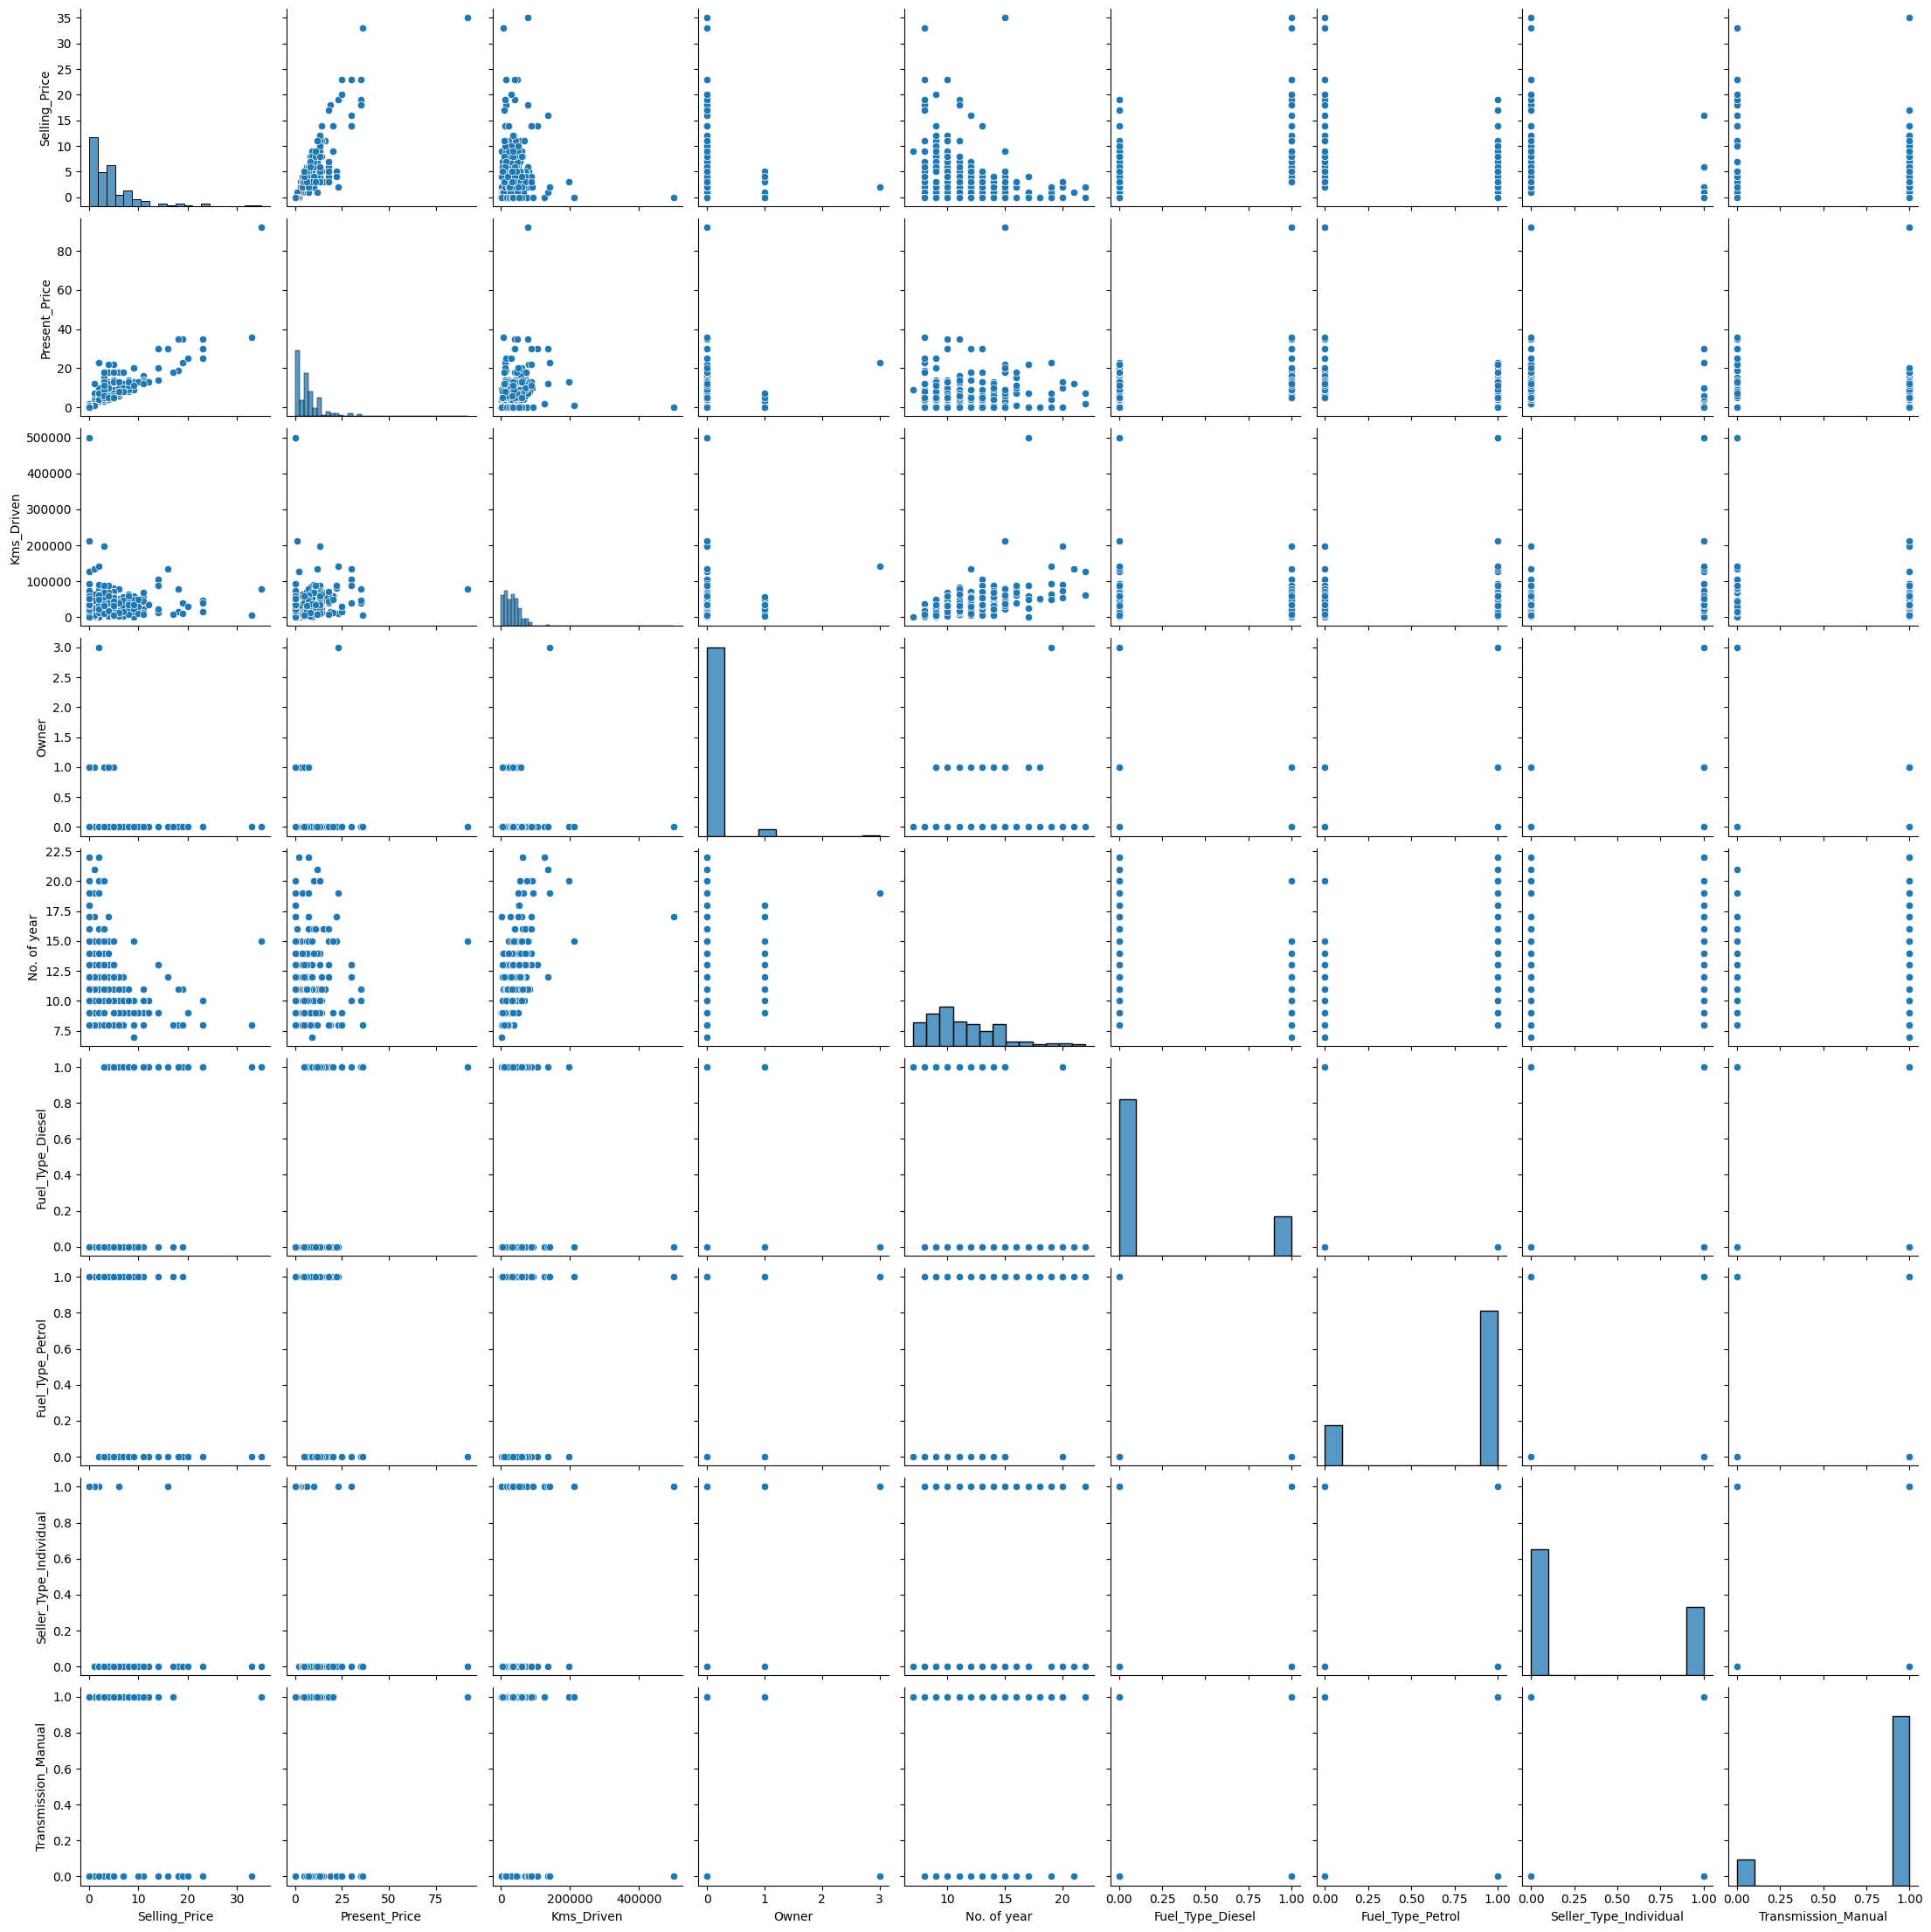

In [55]:
sns.pairplot(df)

<Axes: >

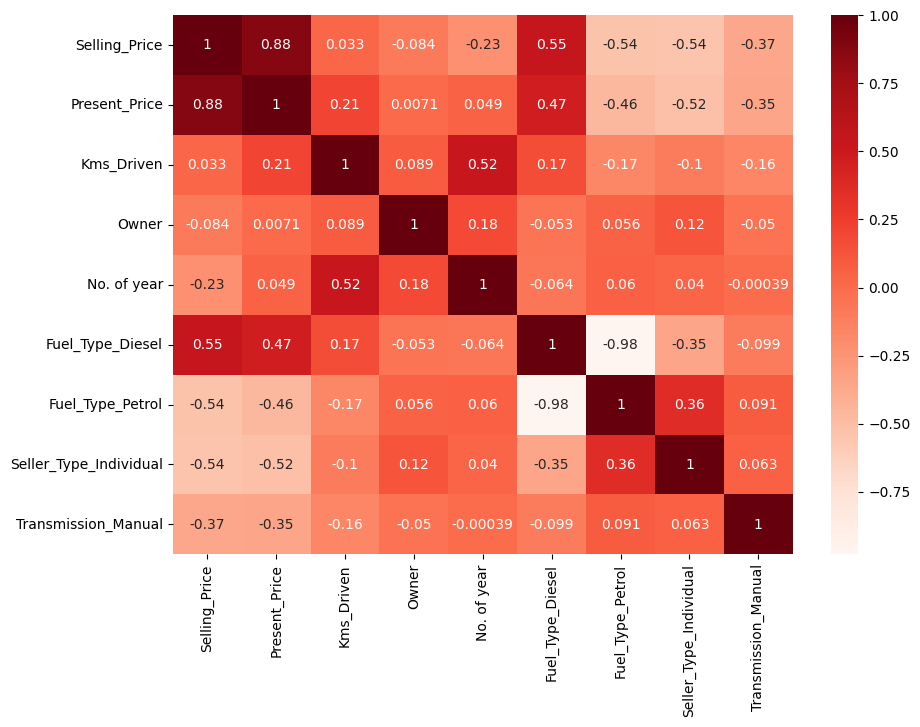

In [62]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True, cmap='Reds')

In [63]:
X = np.array(df.drop(columns=['Selling_Price']))
y = np.array(df['Selling_Price'])

In [72]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [73]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3,5,27000,0,11,0,1,0,1
1,4,9,43000,0,12,1,0,0,1
2,7,9,6900,0,8,0,1,0,1
3,2,4,5200,0,14,0,1,0,1
4,4,6,42450,0,11,1,0,0,1


In [74]:
print(X)

     Present_Price  Kms_Driven  Owner  No. of year  Fuel_Type_Diesel  \
0                5       27000      0           11                 0   
1                9       43000      0           12                 1   
2                9        6900      0            8                 0   
3                4        5200      0           14                 0   
4                6       42450      0           11                 1   
..             ...         ...    ...          ...               ...   
296             11       33988      0            9                 1   
297              5       60000      0           10                 0   
298             11       87934      0           16                 0   
299             12        9000      0            8                 1   
300              5        5464      0            9                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1

In [75]:
y

0       3
1       4
2       7
3       2
4       4
       ..
296     9
297     4
298     3
299    11
300     5
Name: Selling_Price, Length: 301, dtype: int64

# Feature Selection(Feature Importance)

In [68]:
from sklearn.ensemble import ExtraTreesRegressor

In [76]:
model = ExtraTreesRegressor()
feat_imp = model.fit(X,y)

In [77]:
feat_imp.feature_importances_

array([0.39028641, 0.04194257, 0.00075841, 0.07747175, 0.21853838,
       0.0085351 , 0.12130085, 0.14116654])

<Axes: >

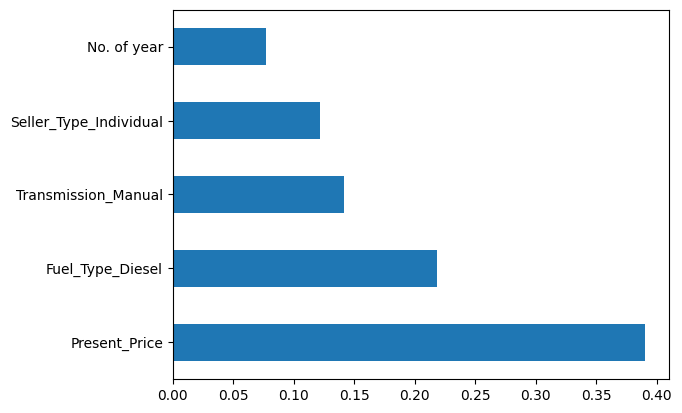

In [78]:
imp = pd.Series(feat_imp.feature_importances_, index=X.columns)
imp.nlargest(5).plot(kind='barh')

In [79]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
X_test

,Present_Price,Kms_Driven,Owner,No. of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9,61381,0,10,1,0,0,1
150,0,6000,0,14,0,1,1,1
226,5,24678,0,10,0,1,0,1
296,11,33988,0,9,1,0,0,1
52,19,15000,0,8,1,0,0,0
...,...,...,...,...,...,...,...,...
137,0,16000,0,12,0,1,1,1
227,4,57000,0,14,0,1,0,1
26,5,55138,0,12,0,1,0,1
106,3,16500,1,11,0,1,1,1


Model Selection

In [82]:
regressor = RandomForestRegressor()


#HyperParameter tuning

In [85]:
n_estimators = [int(i) for i in np.linspace(start=100,stop= 1200, num= 12)]

max_feature = ['auto','sqrt']

max_depth = [int(i) for i in np.linspace(start=5,stop= 30, num= 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [94]:
random_grid = {'n_estimators': n_estimators, 
               'max_features':max_feature ,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
rf_regressor = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  n_jobs=1)

Training the model

In [100]:
rf_regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [102]:
y_pred = rf_regressor.predict(X_test)

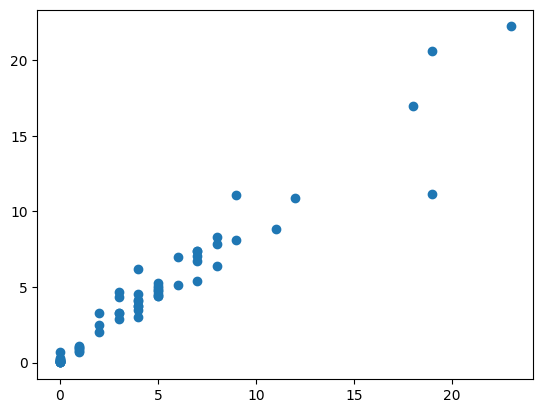

In [103]:
plt.scatter(y_test, y_pred)

In [104]:
finaldf = pd.DataFrame({"Actual":y_test,"PRedicted":y_pred})

In [105]:
finaldf

,Actual,PRedicted
223,8,6.419
150,0,0.241
226,5,4.569
296,9,8.123
52,18,16.972
...,...,...
137,0,0.121
227,2,2.058
26,4,3.034
106,1,0.984


<Axes: >

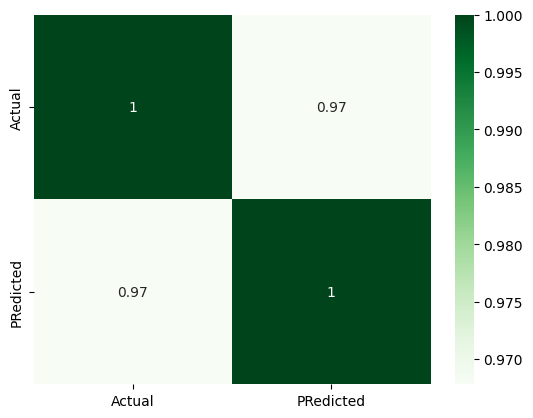

In [106]:
sns.heatmap(finaldf.corr(),annot=True, cmap="Greens")

Performace / Accuracy

In [107]:
r2_score(y_test,y_pred)

0.9343830151524934